Goal of this notebook:

Explore Decision Tree hyperparameters to find the best common combination among all projects.

Outputs: 
- Validation curves for each hyperparameter
- Best combination of decision tree hyperparameters

In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.impute import SimpleImputer
import math

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [4]:
df_training = pd.read_csv("../../data/dataset-training.csv")
target_names = sorted(list(df_training['developerdecision'].unique()))
df_na = df_training[df_training.isna().any(axis=1)]

len(df_na) / len(df_training)

0.24562591468076275

# Decision Tree

### Base classifier

In [5]:
dt = DecisionTreeClassifier(random_state=99)

In [6]:
result_dt = classifier_utils.ProjectsResults(dt, projects, non_features_columns)

In [7]:
report_dt = result_dt.get_report_df(include_overall=True)
report_dt

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,CCI-MIT__XCoLab,5512,3757,0.97200,0.97200,0.9720,0.97200,0.57300,0.93300
1,apache__directory-server,845,652,0.92600,0.92800,0.9270,0.92800,0.51200,0.85200
2,jgralab__jgralab,2072,1802,0.83900,0.83900,0.8390,0.83900,0.49100,0.68300
3,Unidata__thredds,1154,950,0.90700,0.90900,0.9080,0.90900,0.77700,0.59400
4,apache__accumulo,4113,3148,0.83800,0.83800,0.8380,0.83800,0.63500,0.55700
5,CloudStack-extras__CloudStack-archive,1424,1106,0.74800,0.75000,0.7490,0.75000,0.43700,0.55500
6,getrailo__railo,815,572,0.65600,0.65000,0.6520,0.65000,0.37800,0.43800
7,Ramblurr__Anki-Android,892,759,0.67200,0.68200,0.6770,0.68200,0.43900,0.43400
8,TeamDev-Ltd__OpenFaces,2979,2859,0.96300,0.96400,0.9640,0.96400,0.93800,0.41500
9,apache__lucene-solr,1256,974,0.55800,0.55500,0.5560,0.55500,0.26600,0.39400


In [8]:
result_dt.get_accuracy_per_class_df(target_names, include_overall=True)

,project,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
0,Ramblurr__Anki-Android,0.171875,0.200000,0.142857,0.581967,0.000000,0.840841,0.689189
1,apache__directory-server,0.000000,NaN,NaN,0.375000,NaN,0.938511,0.934132
2,android__platform_frameworks_base,0.459459,0.257576,0.142857,0.300000,0.000000,0.936818,0.500000
3,freenet__fred,0.622881,0.412698,0.000000,0.396947,0.000000,0.733496,0.497006
4,alexo__wro4j,0.528061,0.083333,0.071429,0.464396,0.000000,0.576190,0.400990
5,apache__lucene-solr,0.469697,0.274510,0.000000,0.488152,0.375000,0.663934,0.640927
6,getrailo__railo,0.400000,0.463415,0.000000,0.303797,0.000000,0.748634,0.796296
7,atlasapi__atlas,0.350515,0.261905,0.285714,0.387755,0.000000,0.569149,0.735632
8,hibernate__hibernate-orm,0.547085,0.452830,0.250000,0.267327,0.250000,0.602339,0.569444
9,CloudStack-extras__CloudStack-archive,0.533333,0.802260,0.714286,0.476190,0.400000,0.836439,0.790816


### Validation curves

Parameters to explore:
- min_samples_leaf
- criterion
- max_depth

##### min_samples_leaf

min_samples_leaf : int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

### Overall

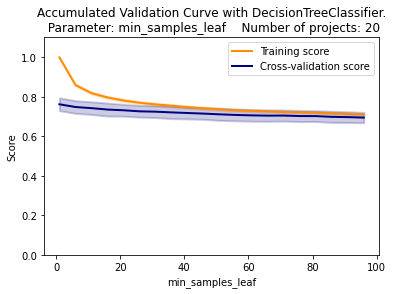

In [9]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, dt, 'min_samples_leaf',
                                        np.arange(1, 100, 5),
                                        non_features_columns)

### Per project

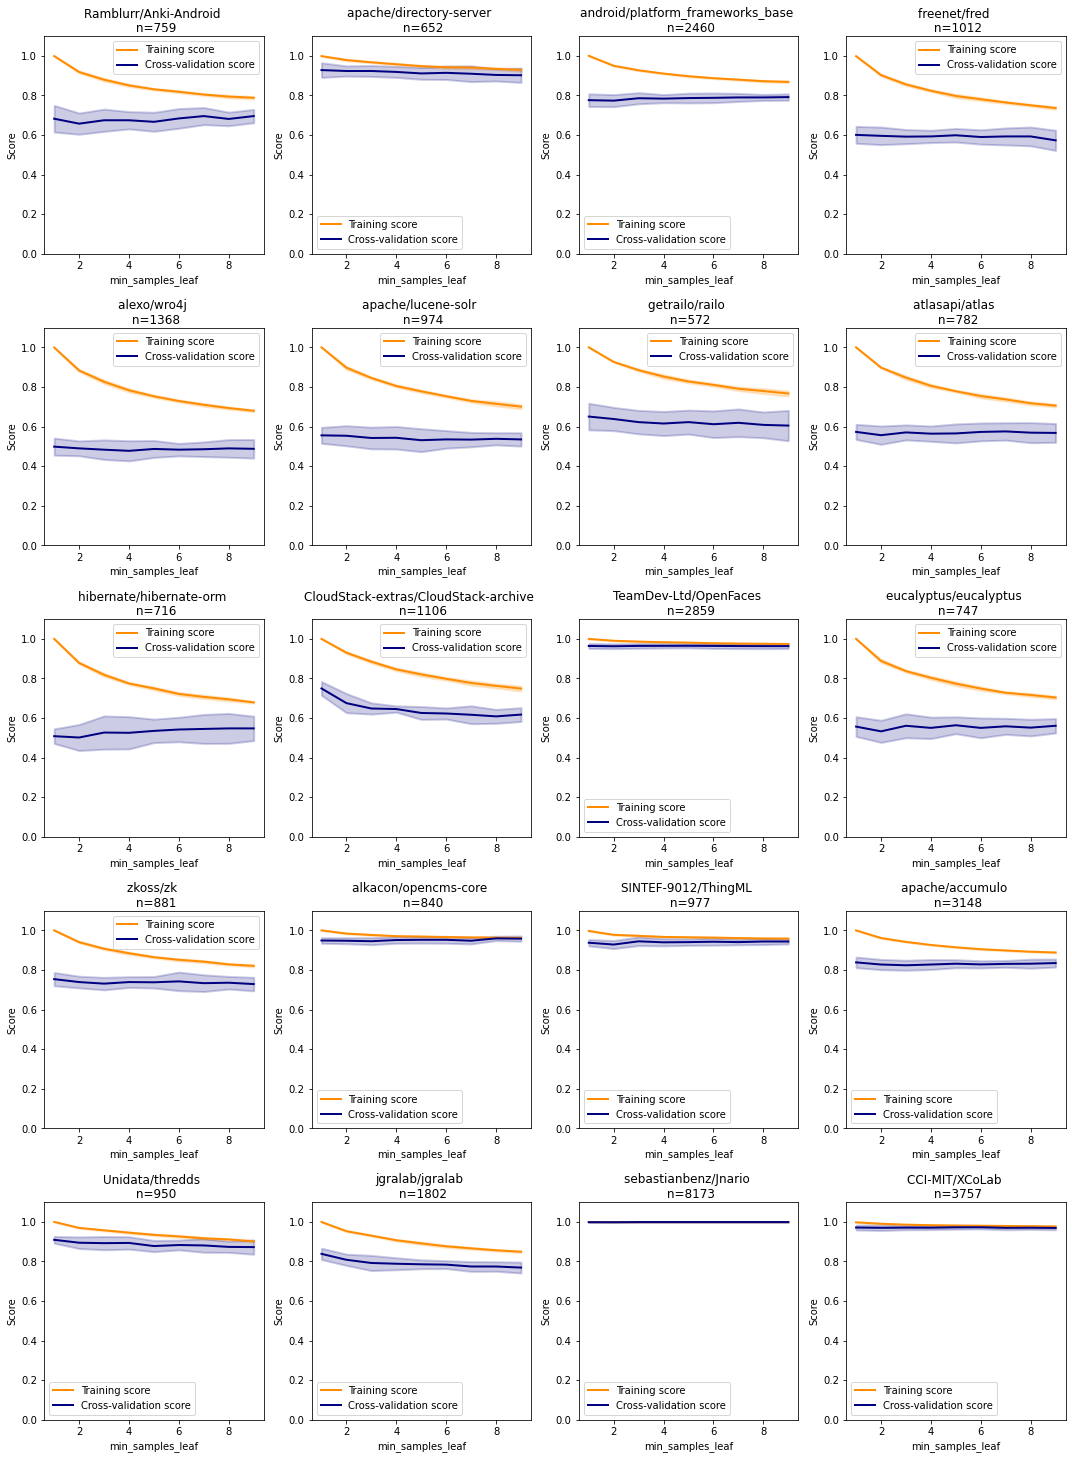

In [10]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, dt, 'min_samples_leaf',
                                    np.arange(1, 10, 1),
                                    non_features_columns)

##### criterion

criterion : {“gini”, “entropy”}, default=”gini”

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

### Overall

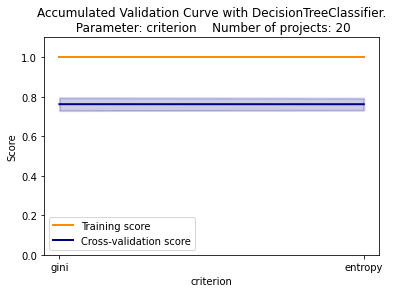

In [11]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, dt, 'criterion',
                                        ('gini', 'entropy'),
                                        non_features_columns)

### Per project

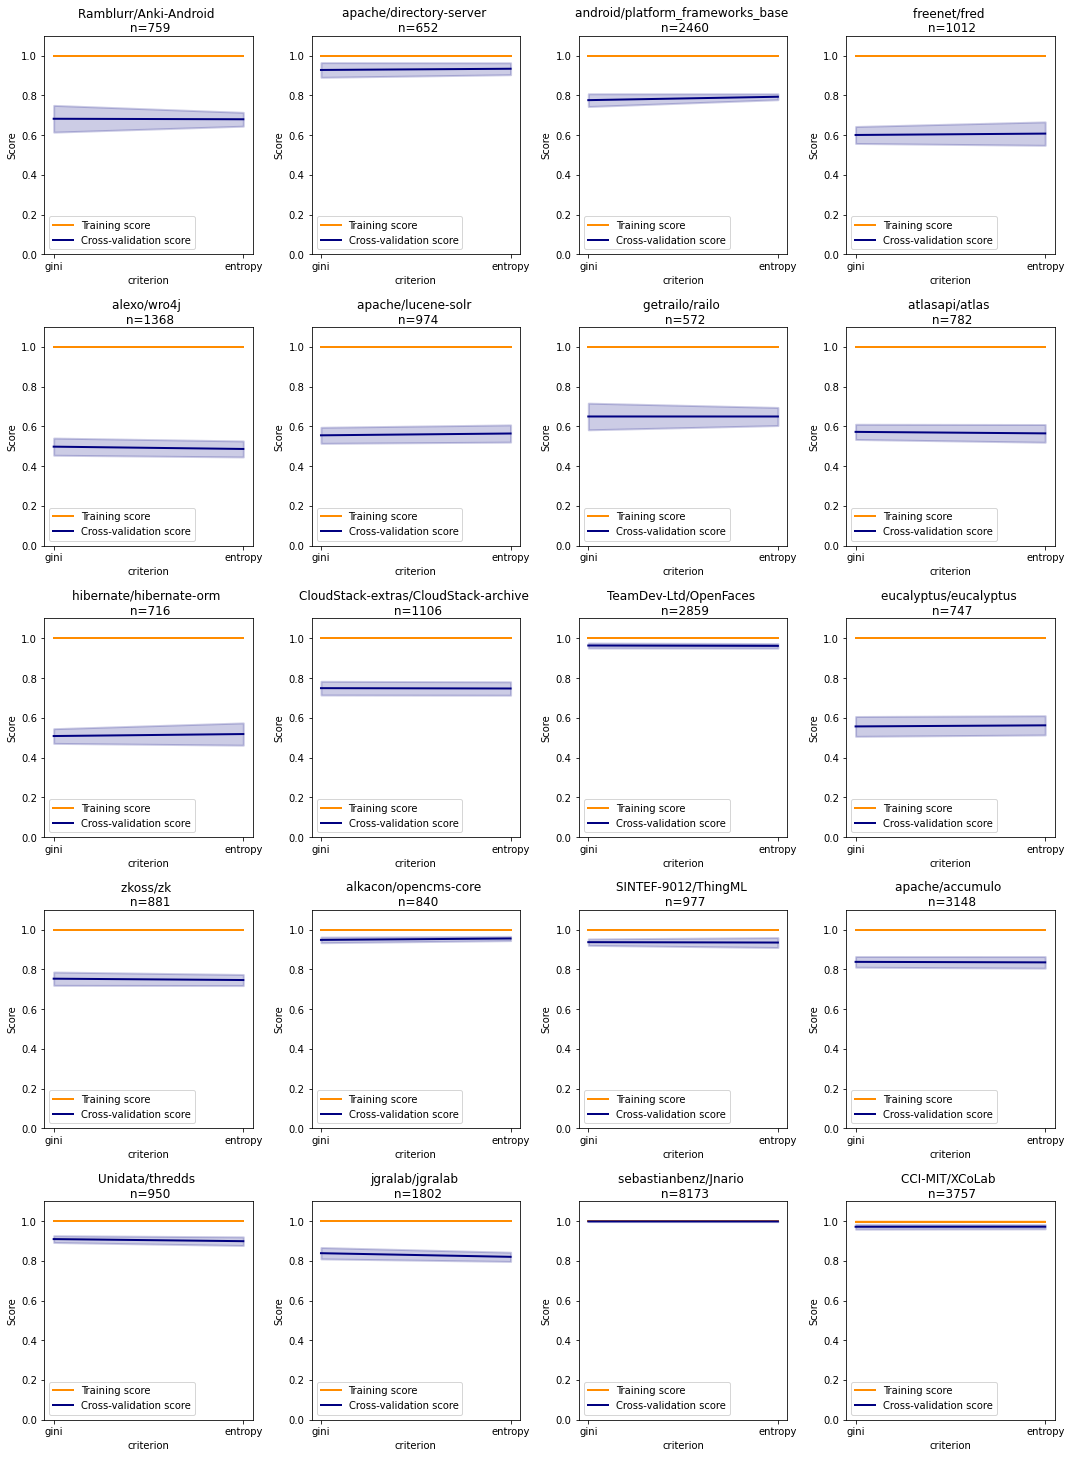

In [12]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, dt, 'criterion',
                                    ('gini', 'entropy'),
                                    non_features_columns)

#### max_depth

max_depth : int, default=None

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [13]:
average_tree_depth, tree_depths = classifier_utils.get_average_tree_depth(dt, projects, non_features_columns)
print(f'Average tree depth among {len(tree_depths)} projects using default max_depth: {average_tree_depth}')
print(f'Individual tree depths: {tree_depths}')

Average tree depth among 20 projects using default max_depth: 18.2
Individual tree depths: [21, 17, 26, 19, 22, 17, 15, 16, 23, 16, 15, 21, 22, 15, 14, 25, 14, 21, 8, 17]


### Overall

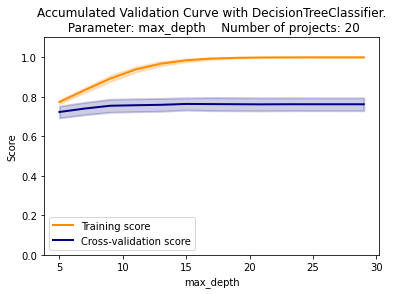

In [14]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, dt, 'max_depth',
                                        np.arange(5,30,2),
                                        non_features_columns)

### Per project

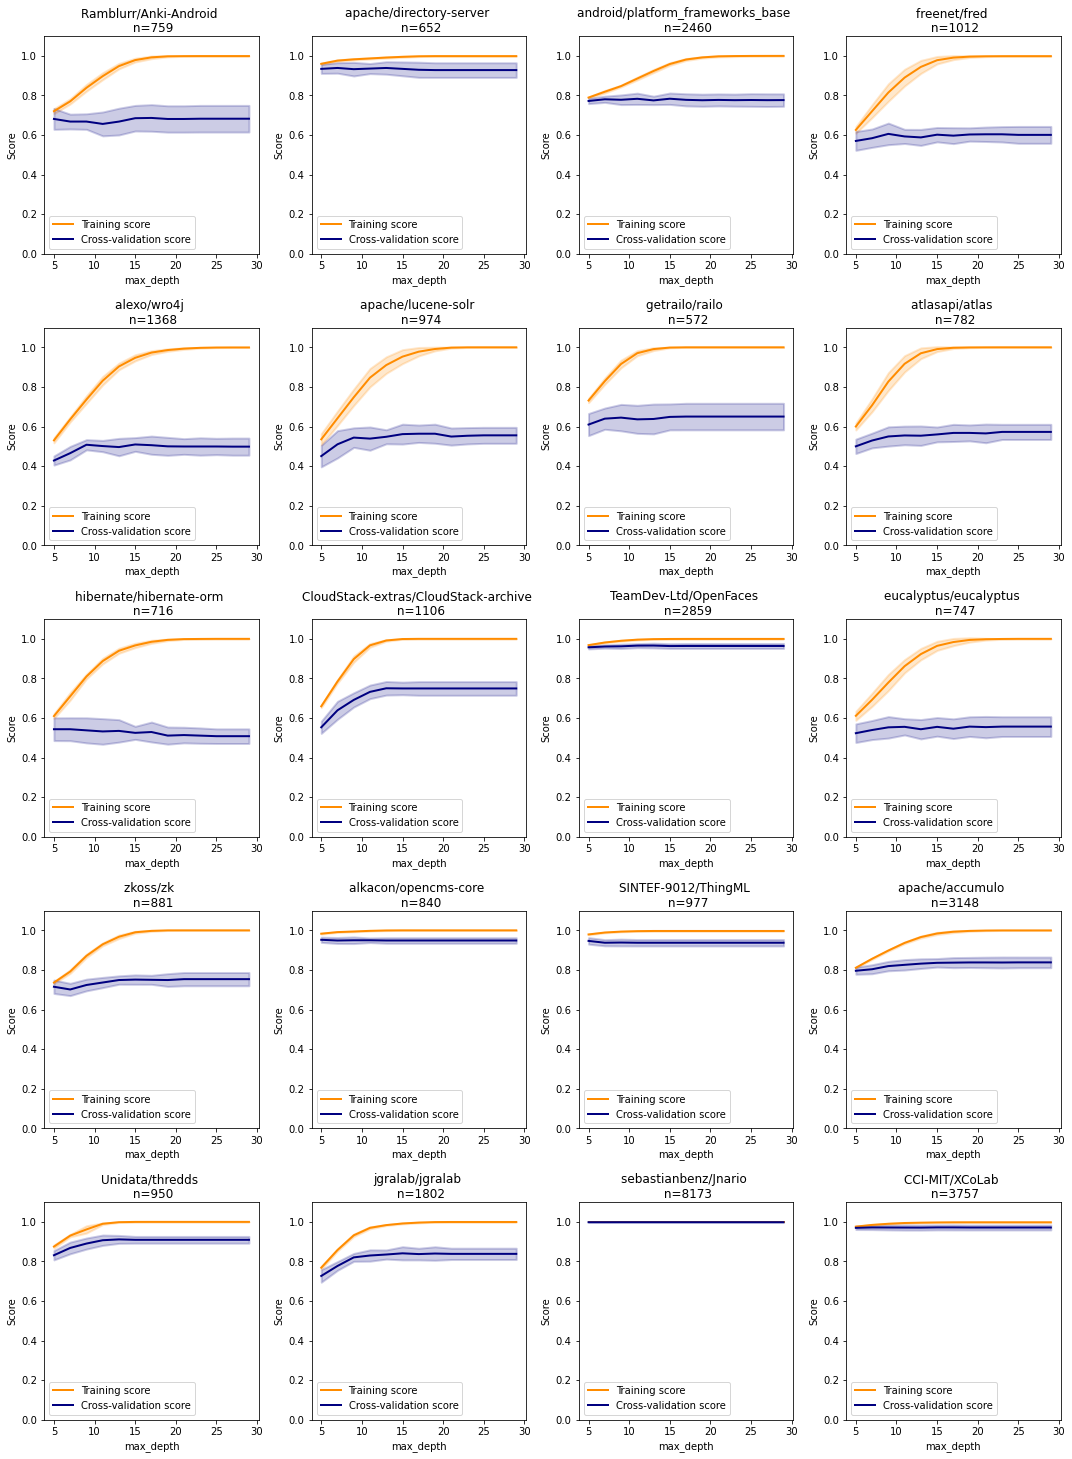

In [15]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, dt, 'max_depth',
                                        np.arange(5,30,2),
                                    non_features_columns)

### Tuning hyperparameters


Parameters range to explore, according to the validation curves:
- min_samples_leaf: 40, 60, 80
    - There is not much difference after increasing this parameter. The more it grows, the tendendy is that the difference between the two curves lessens.
- criterion: do no use
    - There is no visible difference between the two possible values (gini and entropy) for our data.
- max_depth: None, 10, 20, 30
    - The tendency observed in the curves is that the more this parameter grows, bigger the distance between the curves. This indicates that the model is overfitting for bigger values of max_depth.




In [16]:
print("Hyperparameters of Decision Tree:")
dt.get_params()

Hyperparameters of Decision Tree:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 99,
 'splitter': 'best'}

In [17]:
parameters = {'min_samples_leaf':[1, 40, 60, 80],
              'max_depth':[None, 10, 20, 30]
                 }

In [18]:
results = classifier_utils.grid_search_all(projects, dt, parameters, non_features_columns)

### Ranking combinations by medals

In [19]:
results.sort_values(['gold_medals', 'silver_medals', 'bronze_medals', 'total_medals'], ascending=False)

,min_samples_leaf,max_depth,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals,mean_rank
2,1,20.0,0.763294,15,8,5,2,3.80
0,1,NaN,0.761970,16,7,6,3,3.75
3,1,30.0,0.762031,16,7,6,3,3.70
1,1,10.0,0.758178,9,6,2,1,3.95
5,40,10.0,0.718587,4,3,1,0,4.85
4,40,NaN,0.718371,4,3,0,1,4.95
6,40,20.0,0.718371,4,3,0,1,4.95
7,40,30.0,0.718371,4,3,0,1,4.95
8,60,NaN,0.706384,1,1,0,0,8.80
9,60,10.0,0.706384,1,1,0,0,8.80


### Ranking combinations by mean rank

In [20]:
results.sort_values(['mean_rank'])

,min_samples_leaf,max_depth,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals,mean_rank
3,1,30.0,0.762031,16,7,6,3,3.70
0,1,NaN,0.761970,16,7,6,3,3.75
2,1,20.0,0.763294,15,8,5,2,3.80
1,1,10.0,0.758178,9,6,2,1,3.95
5,40,10.0,0.718587,4,3,1,0,4.85
4,40,NaN,0.718371,4,3,0,1,4.95
6,40,20.0,0.718371,4,3,0,1,4.95
7,40,30.0,0.718371,4,3,0,1,4.95
8,60,NaN,0.706384,1,1,0,0,8.80
9,60,10.0,0.706384,1,1,0,0,8.80


## Comparing the models with the best parameters with the base model

In [21]:
base_model = dt
model_1 = DecisionTreeClassifier(random_state=99, min_samples_leaf=40, max_depth=None)
model_2 = DecisionTreeClassifier(random_state=99, min_samples_leaf=80, max_depth=None)
model_3 = DecisionTreeClassifier(random_state=99, min_samples_leaf=60, max_depth=None)

In [22]:
models = [base_model, model_1, model_2, model_3]
models_names = ['base', 'model1', 'model2', 'model3']
import importlib
importlib.reload(classifier_utils)
comparison = classifier_utils.compare_models(models, models_names, projects, non_features_columns)

In [23]:
comparison.filter(regex=("model|accuracy|precision|recall")).sort_values(['accuracy'], ascending=False)

,precision,recall,accuracy,model
0,0.76225,0.76205,0.76205,base
1,0.69065,0.71840,0.71840,model1
3,0.66660,0.70640,0.70640,model3
2,0.65670,0.70260,0.70260,model2
